<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/Notebook_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

En esta notebook, vamos a demostrar como funcionan los algoritmos vistos en clase y su implementación en Scikit-learn.

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris #dataset que estudia flores

In [2]:
iris = load_iris()

# Esto carga el famoso conjunto de datos Iris desde sklearn.datasets.
# El resultado iris es un objeto tipo Bunch, que se comporta como un diccionario y contiene:

# iris.data: características (longitud y ancho del sépalo y pétalo)

# iris.target: clases (0, 1, 2 → Setosa, Versicolor, Virginica)

# iris.feature_names: nombres de las columnas

# iris.target_names: nombres de las clases

data, target = load_iris(return_X_y=True, as_frame=True) #as_frame=True: hace que los datos se devuelvan como DataFrame y Series de pandas en lugar de arrays de NumPy.

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [8]:
X = np.array(data) #features
y = np.array(target)

In [9]:
feature_names = data.columns #nombres de los features

# Random Forest

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier)

In [10]:
from sklearn.ensemble import RandomForestClassifier  #importamos el modelo de randomforest

In [11]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt') #este paso es para instanciar  , tarea buscar que otros valores puedo reemplazar
#n_estimators=200 el modelo construirá 200 árboles de decisión en el bosque. Mientras más árboles mejor rendimiento, pero más lento.
#criterion='entropy' la entropía mide la incertidumbre o el desorden (inspirado en la teoría de la información)
#max_features='sqrt' en cada división de nodo, el modelo selecciona aleatoriamente la raíz cuadrada del número total de características para decidir la mejor división.
# Esto último introduce aleatoriedad y ayuda a reducir el overfitting

In [13]:
rf.fit(X, y) #entrenamos

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [14]:
estimator = rf.estimators_[5] #vamos a construir un estimador para que pase por 5 instancias

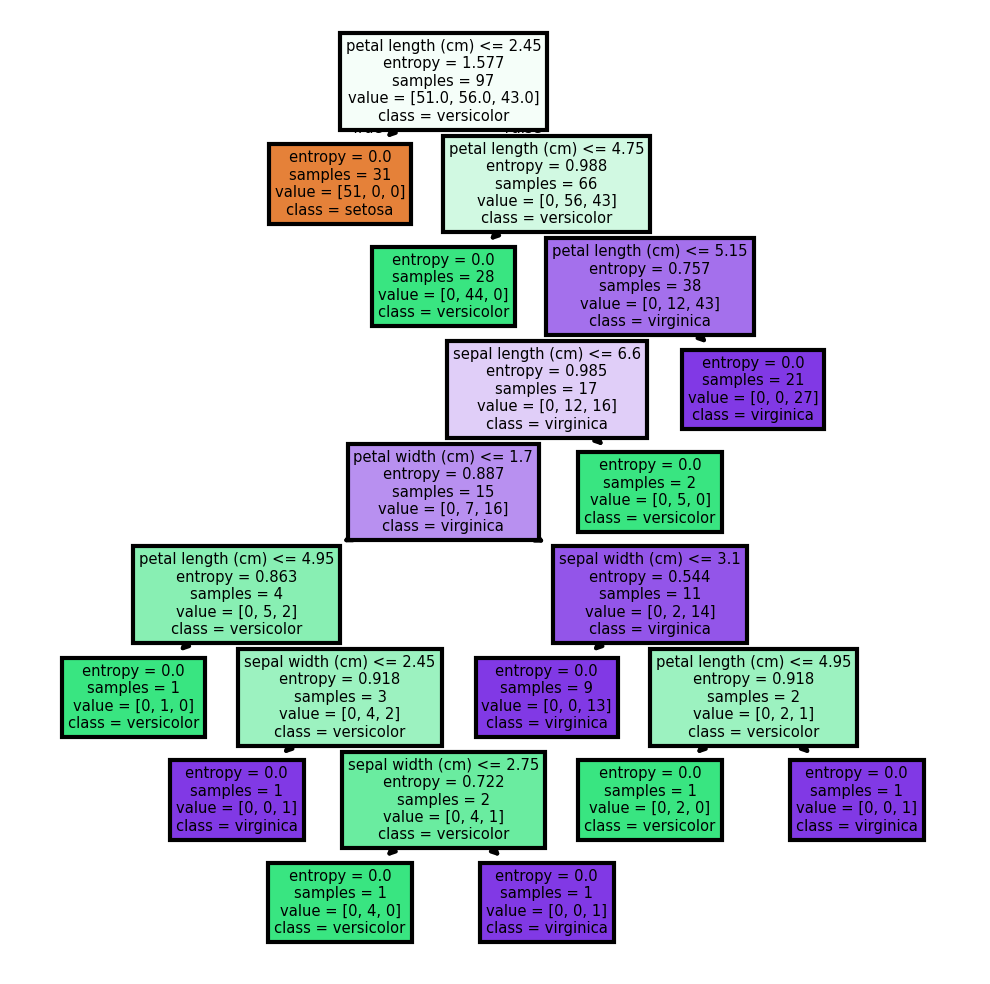

In [16]:
from sklearn.tree import plot_tree #para visualizar el árbol

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300) #dpi es alta resolución

plot_tree(rf[0], #accede al primer árbol del bosque
          feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], #nombres de features
          class_names=['setosa', 'versicolor', 'virginica'], #clases de plantas
          filled = True); #rellena los nodos con colores para distinguir mejor las clases


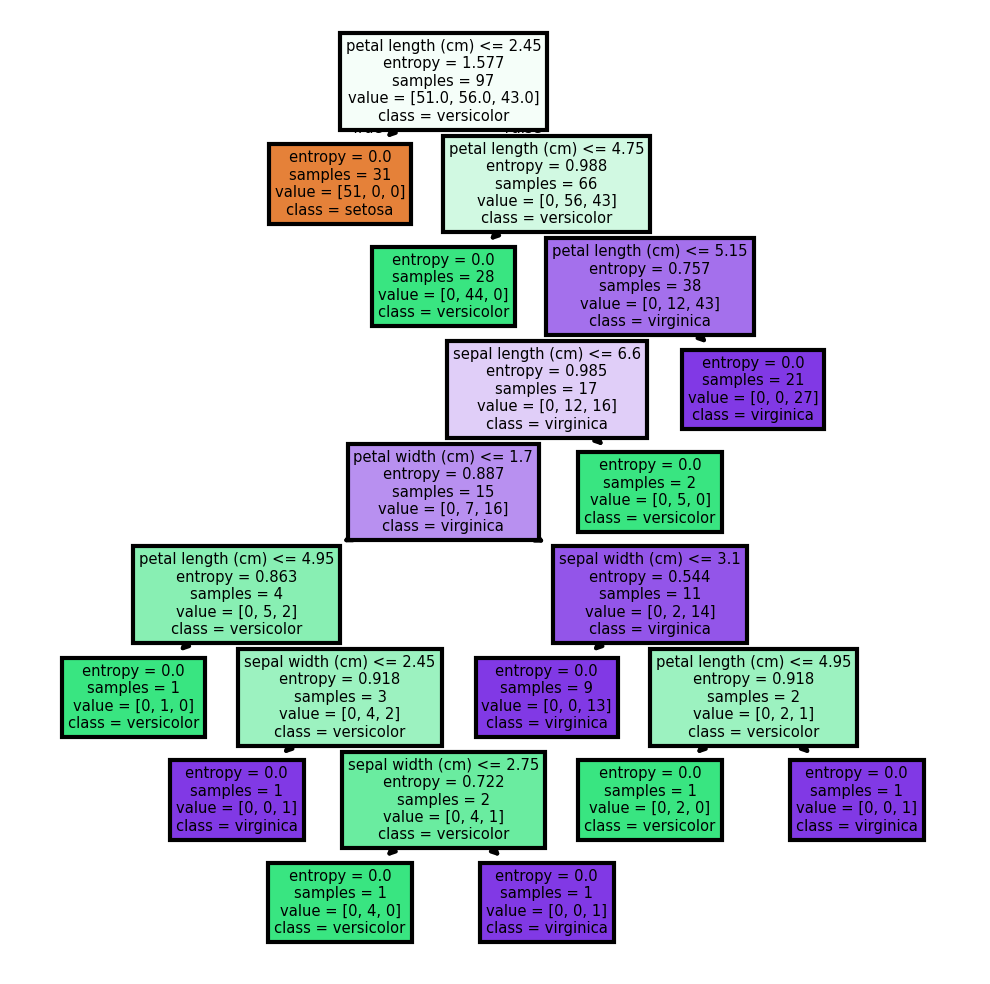

In [17]:
from sklearn.tree import plot_tree #para visualizar el árbol

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300) #dpi es alta resolución

plot_tree(rf.estimators_[0], #accede al primer árbol del bosque
          feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], #nombres de features
          class_names=['setosa', 'versicolor', 'virginica'], #clases de plantas
          filled = True); #rellena los nodos con colores para distinguir mejor las clases

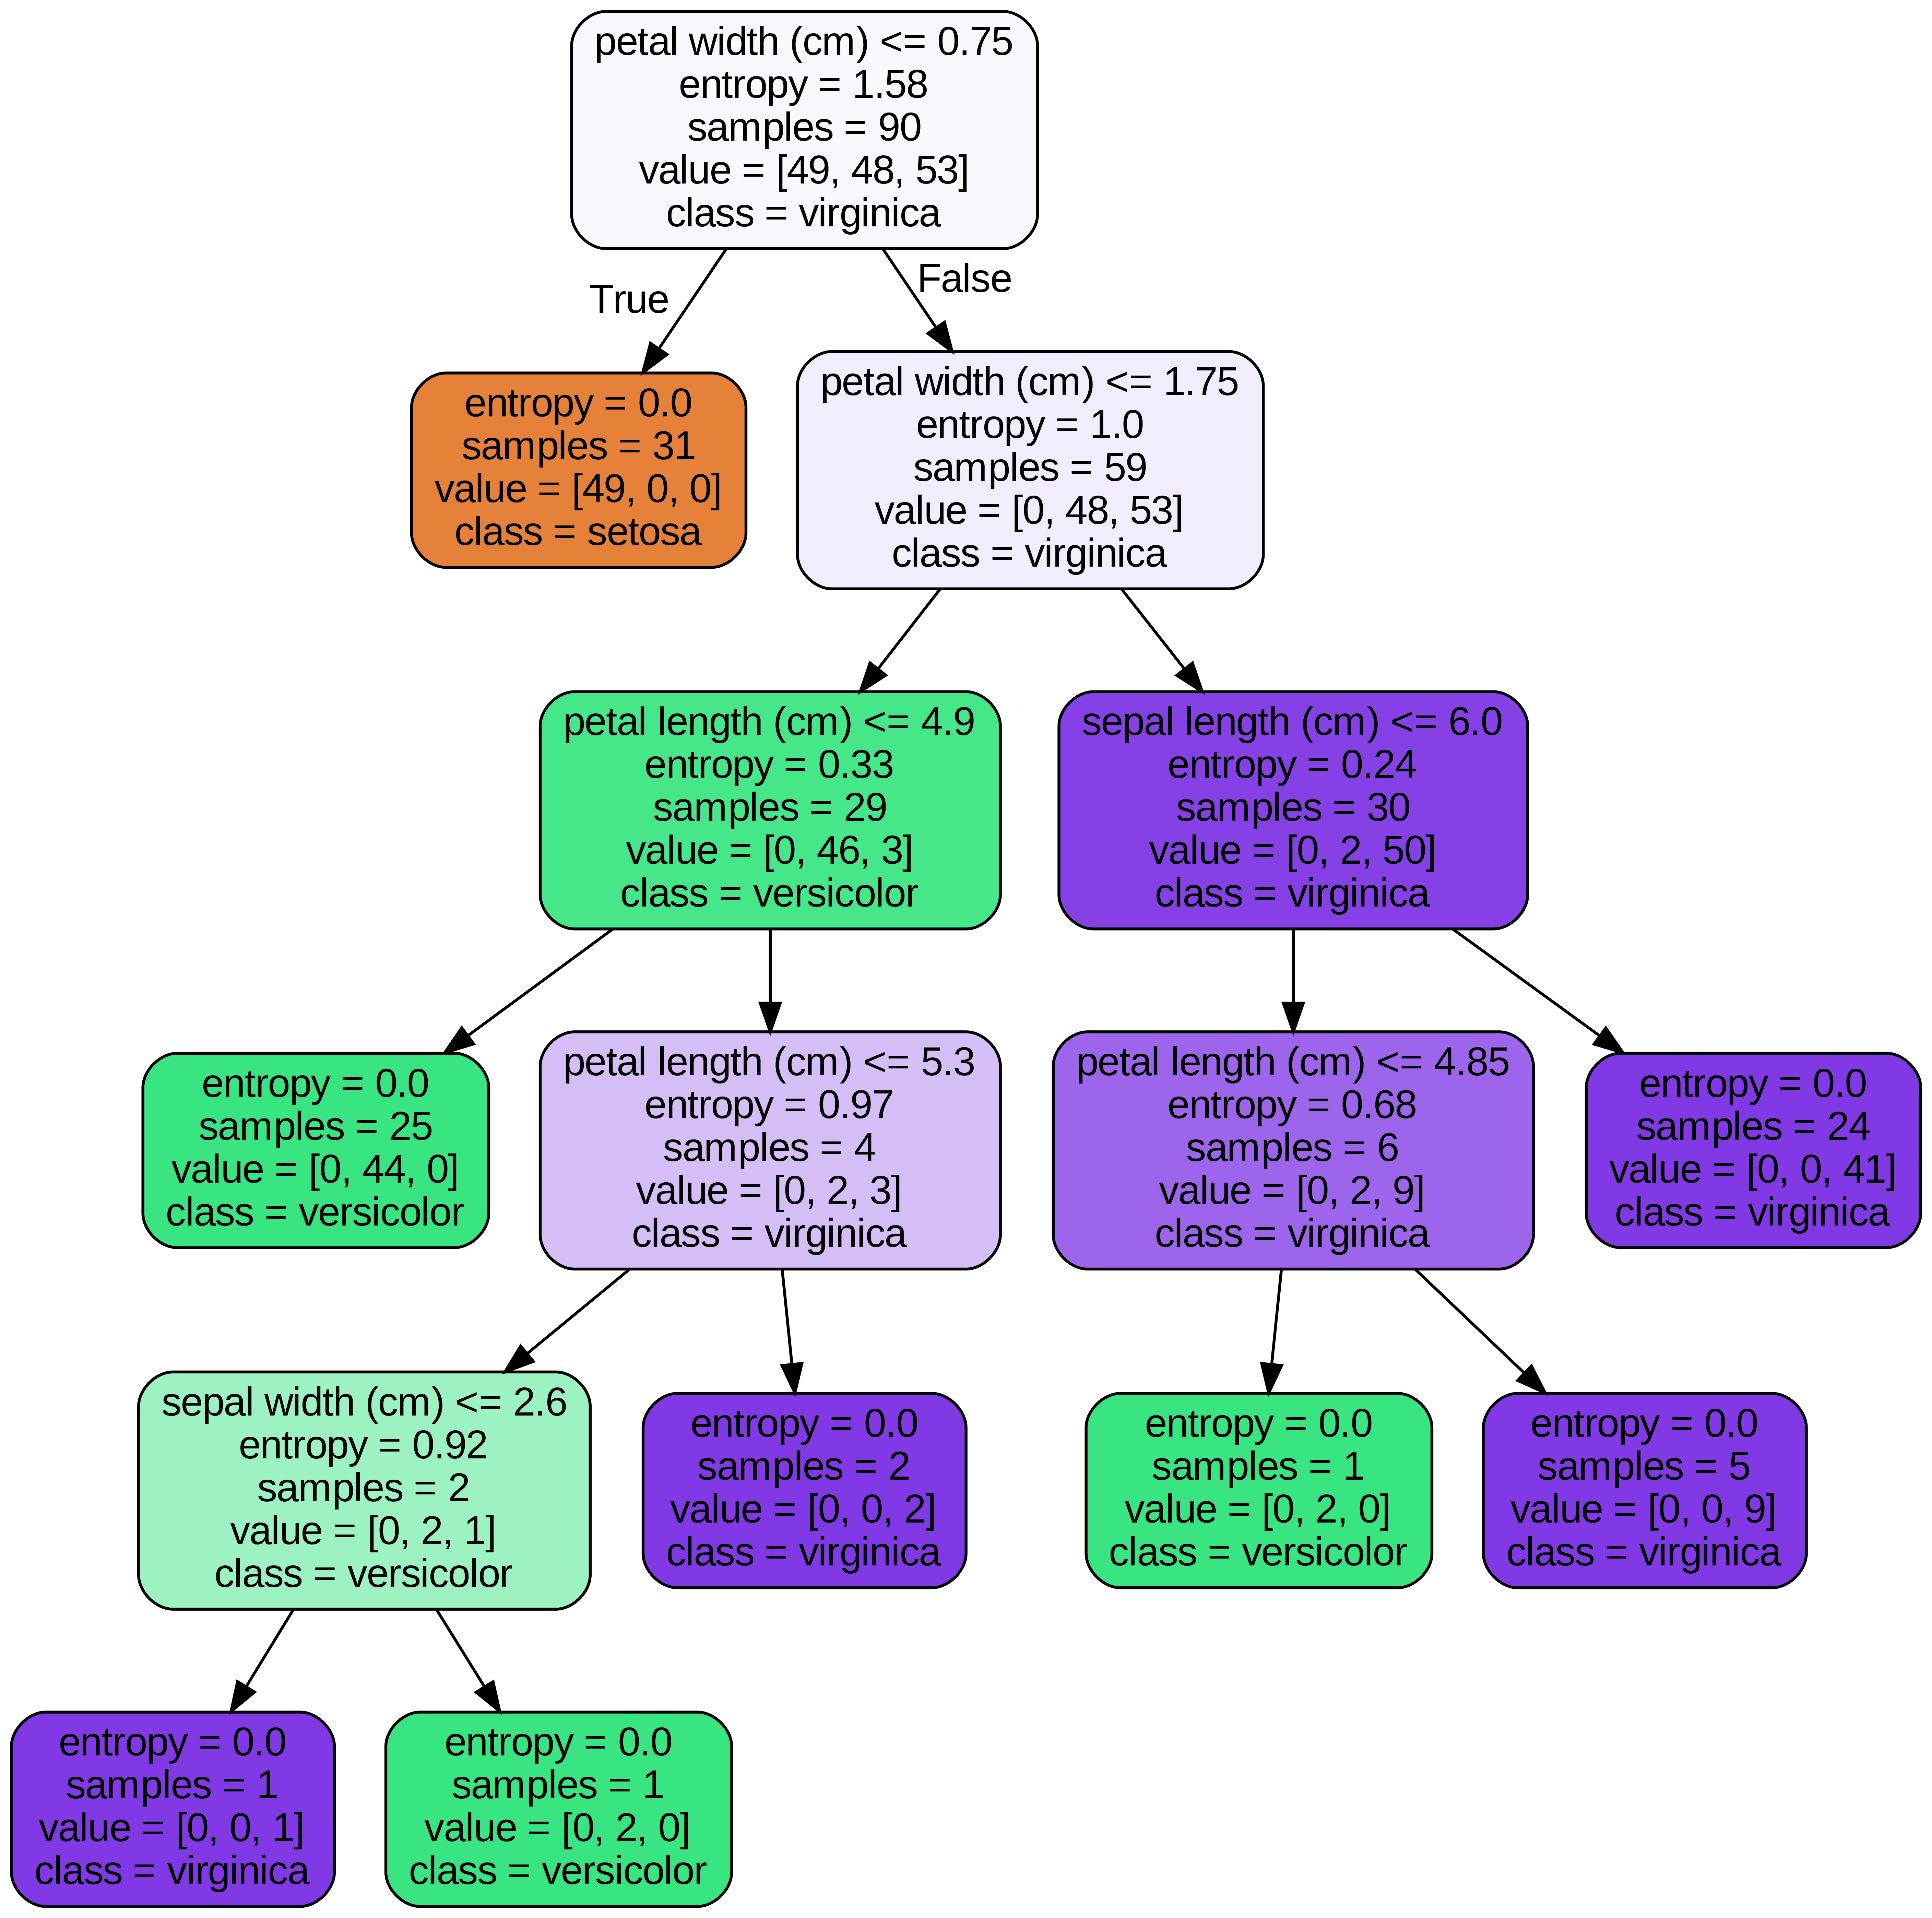

In [20]:
from sklearn.tree import export_graphviz #genera un archivo .dot que describe el árbol de decisión

export_graphviz(estimator, out_file='tree.dot', #debe ser un árbol individual con estimator // con out_file guarda el archivo en formato Graphviz
                feature_names = iris.feature_names, #nombre de las variables en este caso el dataset Iris
                class_names = iris.target_names, #nombre de las clases (Setosa, Versicolor, Virginica)
                rounded = True, proportion = False, #si va a redondear las esquinas de los nodos // Proportion=False no escala los nodos según proporción de datos
                precision = 2, filled = True) #precision=2 muestra dos decimales #filled=True rellena los nodos con colores según la clase dominante

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) #convierte el archivo .dot a imagen png // -Gdpe=600 alta resolución (ideal para impresión o zoom)

from IPython.display import Image
Image(filename = 'tree.png') #muestra la imagen del árbol dentro de la notebook

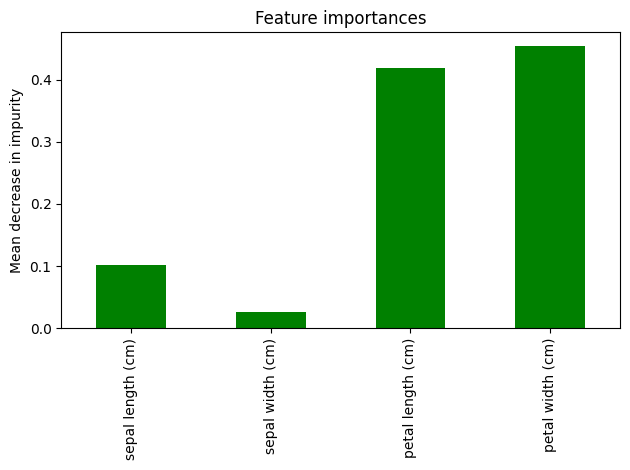

In [19]:
importances = rf.feature_importances_ #para identificar la importancia que tiene cada uno de nuestros features, muestra lo que descrubrio el modelo
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color='green')
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC, LinearSVC #importamos las dos clases svc y linearsvc

In [ ]:
X_ir = data.iloc[: ,[0, 2]] #: todas las filas (slicing) con las dos primeras columnas

In [ ]:
sup_vector = SVC()

In [ ]:
sup_vector.fit(X_ir, y)

SVC()

In [ ]:
sup_vector.support_vectors_  #quedaron duplas de valores,

array([[4.3, 1.1],
       [5.7, 1.7],
       [5.1, 1.7],
       [4.8, 1.9],
       [5.1, 1.9],
       [7. , 4.7],
       [6.9, 4.9],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [6.1, 4.7],
       [5.6, 4.5],
       [6.2, 4.5],
       [5.9, 4.8],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [5.5, 4.4],
       [6.1, 4.6],
       [5. , 3.3],
       [5.1, 3. ],
       [5.8, 5.1],
       [4.9, 4.5],
       [6.5, 5.1],
       [6.4, 5.3],
       [5.7, 5. ],
       [5.8, 5.1],
       [6.4, 5.3],
       [7.7, 6.9],
       [6. , 5. ],
       [5.6, 4.9],
       [6.3, 4.9],
       [6.2, 4.8],
       [6.1, 4.9],
       [7.9, 6.4],
       [6.3, 5.1],
       [6. , 4.8],
       [6.9, 5.4],
       [6.9, 5.1],
       [5.8, 5.1],
       [6.7, 5.2],
       [6.3, 5. ],
       [6.5, 5.2],
       [5.9, 5.1]])

In [ ]:
sup_linear = LinearSVC()  #genero un modelo lineal aca lo instancie

In [ ]:
sup_linear.fit(X_ir, y) #lo entrenamos

LinearSVC()

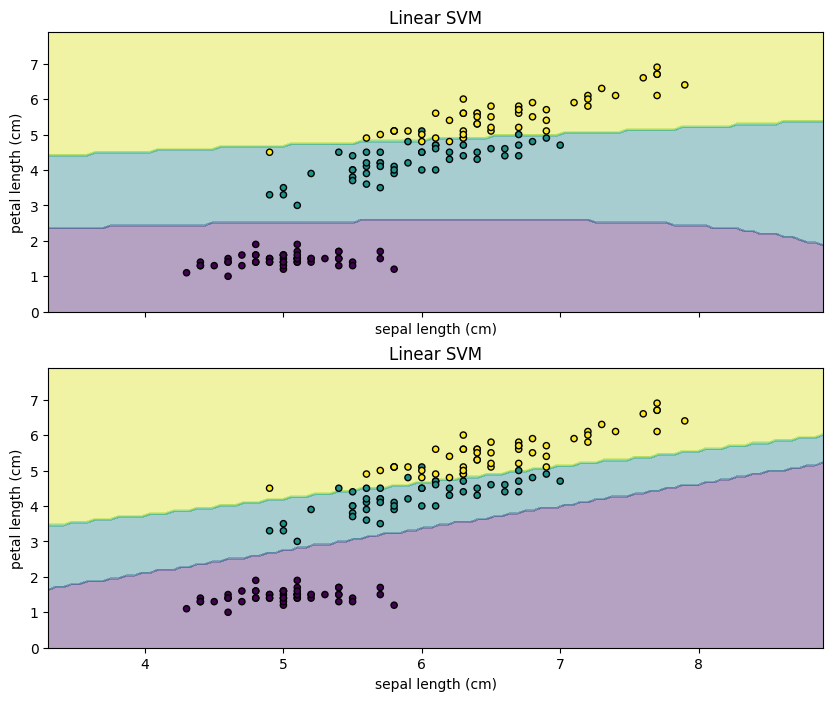

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay  #aca queremos controlar para ver que hizo
from itertools import product

f, ax = plt.subplots(2, 1, sharex="col", sharey="row", figsize=(10, 8))


DecisionBoundaryDisplay.from_estimator(
    sup_vector, X_ir, alpha=0.4, ax=ax[0], response_method="predict") #alpha es un parámetro, tiene que dibujar una linea para ver las 3 clases de plantas
ax[0].scatter(X_ir.iloc[:, 0], X_ir.iloc[:, 1], c=y, s=20, edgecolor="k")
ax[0].set_title('Linear SVM')

DecisionBoundaryDisplay.from_estimator(
    sup_linear, X_ir, alpha=0.4, ax=ax[1], response_method="predict")
ax[1].scatter(X_ir.iloc[:, 0], X_ir.iloc[:, 1], c=y, s=20, edgecolor="k")
ax[1].set_title('Linear SVM')

plt.show()

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn.fit(X_ir, y)

KNeighborsClassifier(n_neighbors=25)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


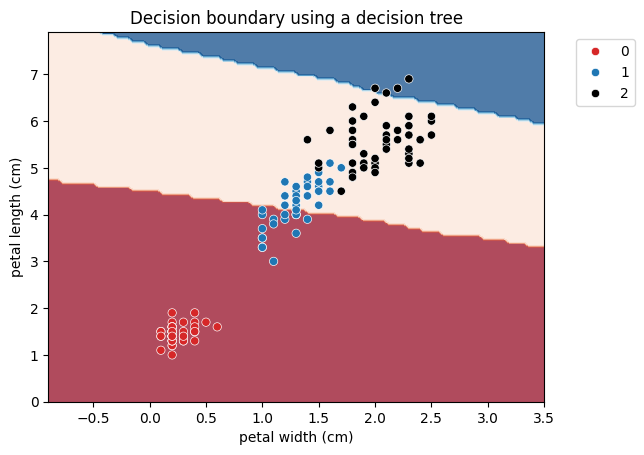

In [ ]:
palette = ["tab:red", "tab:blue", "black"]
columns = ['petal width (cm)', 'petal length (cm)']
data_all = data.copy() #dataframe nuevo
data_all['target_column'] = y #nueva columna y lo completo con y

DecisionBoundaryDisplay.from_estimator(
    knn, np.array(data[columns]), response_method="predict", cmap="RdBu", alpha=0.75  #acá son los parámetros
)
ax = sns.scatterplot(data=data_all, x=columns[0], y=columns[1],
                     hue='target_column', palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")